In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from pymystem3 import Mystem
from string import punctuation 
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /root/.local/bin/mystem

--2022-01-26 11:50:47--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.243, 5.45.205.242, 5.45.205.244, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.243|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz [following]
--2022-01-26 11:50:47--  http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)... 5.45.205.221, 2a02:6b8::3:221
Connecting to cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)|5.45.205.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz.1’

mystem-3.0-linux3.1 100%[===================>]  15.70M 

In [2]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus


# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus


# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


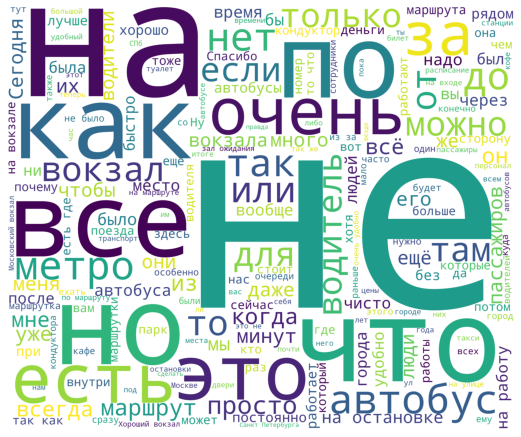

In [3]:
data1 = pd.read_excel('Classified_transport.xlsx')

#  data1.head()

#  data1.isna().sum()


corpus = get_corpus(data1['Review'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [8]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

# Удаление знаков пунктуации из текста
def remove_punct(text):
    #  table = {33: '.', 34: ',', 35: '<', 36: '>', 37: '?', 38: '!', 39: '@', 40: '#', 41: '$', 42: '^', 43: '%', 44: '&', 45: '*', 46: '(', 47: ')', 58: '-', 59: '+', 60: '=', 61: '[', 62: ']', 63: '{', 64: '}', 91: ':', 92: ';', 93: '|', 94: '`', 95: '"', 96: '\'', 123: '/', 124: '~', 125: '№', 126: '\n'}
    #  return text.translate(table)
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

clean_reviews = pd.DataFrame(columns=['Review', 'Class'])

mystem = Mystem() 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_transport_reviews = pd.DataFrame(columns=['Review', 'Class'])

clean_transport_reviews['Review'] = data1['Review'].map(lambda x: x.lower())
clean_transport_reviews['Review'] = clean_transport_reviews['Review'].map(lambda x: remove_punct(x))
clean_transport_reviews['Review'] = clean_transport_reviews['Review'].map(lambda x: mystem.lemmatize(x))
clean_transport_reviews['Review'] = clean_transport_reviews['Review'].map(lambda x: [token.strip() for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
clean_transport_reviews['Review'] = clean_transport_reviews['Review'].map(lambda x: ' '.join(x))

clean_transport_reviews['Class'] = data1['Class']



In [10]:
clean_transport_reviews.head()

,Review,Class
0,гонять приличный молодой человек рюкзак досмот...,Б
1,заниматься страйкбол регулярно ездить метро сн...,Б
2,газета нью йорк тамс опубликовывать мыть серия...,К
3,вагон станция объявлять ужасный голос каждый д...,К
4,пополнять подорожник сегодня электросила экран...,К


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


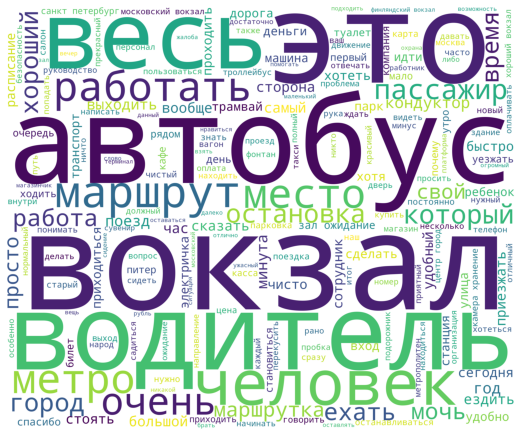

In [11]:
corpus = get_corpus(clean_transport_reviews['Review'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [13]:
clean_transport_reviews['Class'].value_counts()

К    2906
Б     592
Name: Class, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(clean_transport_reviews['Review'], clean_transport_reviews['Class'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
from sklearn.pipeline import Pipeline
# pipeline позволяет объединить в один блок трансформер и модель, что упрощает написание кода и улучшает его читаемость
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer преобразует тексты в числовые вектора, отражающие важность использования каждого слова из некоторого набора слов (количество слов набора определяет размерность вектора) в каждом тексте
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# линейный классификатор и классификатор методом ближайших соседей
from sklearn import metrics
# набор метрик для оценки качества модели
from sklearn.model_selection import GridSearchCV
# модуль поиска по сетке параметров

In [16]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))])
knb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knb_clf', KNeighborsClassifier(n_neighbors=10))])
sgd_ppl_clf.fit(X_train, y_train)
knb_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('knb_clf', KNeighborsClassifier(n_neighbors=10))])

In [17]:
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           Б       0.42      0.54      0.47        78
           К       0.92      0.88      0.90       482

    accuracy                           0.83       560
   macro avg       0.67      0.71      0.69       560
weighted avg       0.85      0.83      0.84       560



In [18]:
predicted_sgd = knb_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           Б       0.00      0.00      0.00         0
           К       1.00      0.82      0.90       560

    accuracy                           0.82       560
   macro avg       0.50      0.41      0.45       560
weighted avg       1.00      0.82      0.90       560



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42, max_iter=10000))])
sgd_ppl_clf.fit(X_train, y_train)
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           Б       0.53      0.59      0.56        88
           К       0.92      0.90      0.91       472

    accuracy                           0.85       560
   macro avg       0.72      0.75      0.73       560
weighted avg       0.86      0.85      0.86       560



In [20]:
sgd_clf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42, max_iter=10000))])
clf_params = {
    'sgd_clf__loss': ['log', 'modified_huber', 'squared_hinge','perceptron'],
    'sgd_clf__epsilon' : [0.00001, 0.0001, 0.001]
}

sgd_clf_model = GridSearchCV(sgd_clf_pipe, clf_params)

sgd_clf_model.fit(X_test, y_test)
predicted_sgd_new = sgd_clf_model.predict(X_valid)
print(metrics.classification_report(predicted_sgd_new, y_valid))

              precision    recall  f1-score   support

           Б       0.46      0.61      0.52        89
           К       0.94      0.90      0.92       611

    accuracy                           0.86       700
   macro avg       0.70      0.75      0.72       700
weighted avg       0.88      0.86      0.87       700



In [21]:
predicted_sgd_val = sgd_ppl_clf.predict(X_valid)
print(metrics.classification_report(predicted_sgd_val, y_valid))

              precision    recall  f1-score   support

           Б       0.50      0.57      0.53       104
           К       0.92      0.90      0.91       596

    accuracy                           0.85       700
   macro avg       0.71      0.73      0.72       700
weighted avg       0.86      0.85      0.86       700



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


rand_forest_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('rft_clf',  RandomForestClassifier(max_depth=50, random_state=42, n_estimators=10000))])


rand_forest_clf.fit(X_train, y_train)

clf_predicted = rand_forest_clf.predict(X_test)
print(metrics.classification_report(clf_predicted, y_test))

              precision    recall  f1-score   support

           Б       0.02      0.67      0.04         3
           К       1.00      0.83      0.90       557

    accuracy                           0.82       560
   macro avg       0.51      0.75      0.47       560
weighted avg       0.99      0.82      0.90       560



In [23]:
predicted_rft_val = rand_forest_clf.predict(X_valid)
print(metrics.classification_report(predicted_rft_val, y_valid))

              precision    recall  f1-score   support

           Б       0.03      1.00      0.05         3
           К       1.00      0.84      0.91       697

    accuracy                           0.84       700
   macro avg       0.51      0.92      0.48       700
weighted avg       1.00      0.84      0.91       700



In [24]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [26]:
from catboost import Pool, CatBoostClassifier


ctb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('ctb_clf', CatBoostClassifier(iterations=20,
                           learning_rate=0.00001,
                           depth=10,
                           loss_function='MultiClass'))])
ctb_ppl_clf.fit(X_train, y_train)
predicted_ctb = ctb_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_ctb, y_test))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.6931427	total: 4.89s	remaining: 1m 32s
1:	learn: 0.6931379	total: 8.05s	remaining: 1m 12s
2:	learn: 0.6931329	total: 11.2s	remaining: 1m 3s
3:	learn: 0.6931277	total: 14.3s	remaining: 57s
4:	learn: 0.6931227	total: 17.4s	remaining: 52.2s
5:	learn: 0.6931175	total: 20.5s	remaining: 47.9s
6:	learn: 0.6931123	total: 23.6s	remaining: 43.9s
7:	learn: 0.6931072	total: 26.7s	remaining: 40.1s
8:	learn: 0.6931021	total: 27s	remaining: 33s
9:	learn: 0.6930970	total: 30.5s	remaining: 30.5s
10:	learn: 0.6930919	total: 35.3s	remaining: 28.9s
11:	learn: 0.6930871	total: 40s	remaining: 26.7s
12:	learn: 0.6930819	total: 44.7s	remaining: 24s
13:	learn: 0.6930768	total: 49.4s	remaining: 21.2s
14:	learn: 0.6930724	total: 53.9s	remaining: 18s
15:	learn: 0.6930678	total: 58.6s	remaining: 14.6s
16:	learn: 0.6930627	total: 59s	remaining: 10.4s
17:	learn: 0.6930578	total: 1m 2s	remaining: 6.93s
18:	learn: 0.6930528	total: 1m 5s	remaining: 3.45s
19:	learn: 0.6930479	total: 1m 8s	remaining: 0us
    

In [27]:
#PART 1
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
from imblearn.pipeline import Pipeline as Pipeln
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule



warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
sgd_ppl_clf = Pipeln([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),

    ('tomek', TomekLinks()),

    ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42, max_iter=10000)),
    ])
sgd_ppl_clf.fit(X_train, y_train)
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           Б       0.53      0.59      0.56        88
           К       0.92      0.90      0.91       472

    accuracy                           0.85       560
   macro avg       0.72      0.75      0.73       560
weighted avg       0.86      0.85      0.86       560



In [29]:
predicted_sgd = sgd_ppl_clf.predict(X_valid)
print(metrics.classification_report(predicted_sgd, y_valid))

              precision    recall  f1-score   support

           Б       0.50      0.57      0.53       104
           К       0.92      0.90      0.91       596

    accuracy                           0.85       700
   macro avg       0.71      0.73      0.72       700
weighted avg       0.86      0.85      0.86       700



NEURAL NETWORKS

In [30]:
import numpy as np

import tensorflow as tf


In [31]:
new_data = clean_transport_reviews.copy()
new_data.head()

,Review,Class
0,гонять приличный молодой человек рюкзак досмот...,Б
1,заниматься страйкбол регулярно ездить метро сн...,Б
2,газета нью йорк тамс опубликовывать мыть серия...,К
3,вагон станция объявлять ужасный голос каждый д...,К
4,пополнять подорожник сегодня электросила экран...,К


In [32]:
from sklearn import preprocessing


y = pd.get_dummies(new_data['Class'])
y

,Б,К
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
3493,1,0
3494,1,0
3495,0,1
3496,0,1


In [53]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
        new_data['Review'], y, test_size=0.25, random_state=42)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [55]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features
model1 = Sequential()
model1.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model1.add(layers.Dense(2, activation='softmax'))

In [56]:
model1.compile(loss='binary_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                87310     
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 87,332
Trainable params: 87,332
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model1.fit(X_train.toarray(), np.array(y_train),
                     epochs=100,
                     verbose=2,
                     validation_data=(X_test.toarray(), np.array(y_test)),
                     batch_size=120)

Epoch 1/100
22/22 - 1s - loss: 0.6569 - accuracy: 0.7888 - val_loss: 0.6226 - val_accuracy: 0.8286 - 1000ms/epoch - 45ms/step
Epoch 2/100
22/22 - 0s - loss: 0.5719 - accuracy: 0.8323 - val_loss: 0.5638 - val_accuracy: 0.8286 - 360ms/epoch - 16ms/step
Epoch 3/100
22/22 - 0s - loss: 0.5007 - accuracy: 0.8425 - val_loss: 0.5159 - val_accuracy: 0.8343 - 352ms/epoch - 16ms/step
Epoch 4/100
22/22 - 0s - loss: 0.4377 - accuracy: 0.8841 - val_loss: 0.4739 - val_accuracy: 0.8446 - 342ms/epoch - 16ms/step
Epoch 5/100
22/22 - 0s - loss: 0.3786 - accuracy: 0.9150 - val_loss: 0.4424 - val_accuracy: 0.8503 - 322ms/epoch - 15ms/step
Epoch 6/100
22/22 - 0s - loss: 0.3280 - accuracy: 0.9295 - val_loss: 0.4192 - val_accuracy: 0.8617 - 333ms/epoch - 15ms/step
Epoch 7/100
22/22 - 0s - loss: 0.2854 - accuracy: 0.9424 - val_loss: 0.4019 - val_accuracy: 0.8629 - 337ms/epoch - 15ms/step
Epoch 8/100
22/22 - 0s - loss: 0.2501 - accuracy: 0.9523 - val_loss: 0.3914 - val_accuracy: 0.8651 - 325ms/epoch - 15ms/step

In [58]:
from keras.backend import clear_session
clear_session()

In [59]:
loss, accuracy = model1.evaluate(X_train.toarray(), np.array(y_train), verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test.toarray(), np.array(y_test), verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9989
Testing Accuracy:  0.8617


In [60]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

газета нью йорк тамс опубликовывать мыть серия дворец подземный метро санкт петербург возможно это связывать каждый станция украшать природный камень каждый станция иметь свой красота библия мысль человек ничто хороший радоваться делать добро инженер проэктировщик который вкладывать огромный труд строительство подземный метро создавать добро многий поколение человек
[4, 40, 192, 1, 335, 361, 131, 63, 281, 362, 649, 465, 27, 1, 513, 35, 23, 21, 73, 336, 2972]


In [61]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[   7 2387 2968 4213  431   11  185 4214  360  160  464  694  173  512
 2969   36  147  432 1356 4215 4216    5   97  535 1990  738 2970  831
  161  535 1990  535 1121   36  147  483   55 4217  254 1991 1992  739
  740   36   46  100    8 1700 4218    5  393 1122    2 1357 4219   13
 1123   86   58  594  134  433  236  620  882  309  155   13  151  947
 1124   14  595   14   32  778 4220  947  259    7 1032   36  147 1701
  309   80   58 4221 4222 2971 1499    0    0    0    0    0    0    0
    0    0]


In [62]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model2.add(layers.GlobalMaxPool1D())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(2, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           442250    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 442,782
Trainable params: 442,782
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model2.fit(X_train, y_train,
                    epochs=20,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=128)
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
21/21 - 1s - loss: 0.6779 - accuracy: 0.7648 - val_loss: 0.6591 - val_accuracy: 0.8286 - 1s/epoch - 53ms/step
Epoch 2/20
21/21 - 0s - loss: 0.6394 - accuracy: 0.8315 - val_loss: 0.6183 - val_accuracy: 0.8286 - 308ms/epoch - 15ms/step
Epoch 3/20
21/21 - 0s - loss: 0.5929 - accuracy: 0.8315 - val_loss: 0.5692 - val_accuracy: 0.8286 - 286ms/epoch - 14ms/step
Epoch 4/20
21/21 - 0s - loss: 0.5395 - accuracy: 0.8315 - val_loss: 0.5173 - val_accuracy: 0.8286 - 305ms/epoch - 15ms/step
Epoch 5/20
21/21 - 0s - loss: 0.4885 - accuracy: 0.8315 - val_loss: 0.4744 - val_accuracy: 0.8286 - 295ms/epoch - 14ms/step
Epoch 6/20
21/21 - 0s - loss: 0.4488 - accuracy: 0.8315 - val_loss: 0.4479 - val_accuracy: 0.8286 - 284ms/epoch - 14ms/step
Epoch 7/20
21/21 - 0s - loss: 0.4227 - accuracy: 0.8315 - val_loss: 0.4320 - val_accuracy: 0.8286 - 280ms/epoch - 13ms/step
Epoch 8/20
21/21 - 0s - loss: 0.3999 - accuracy: 0.8315 - val_loss: 0.4175 - val_accuracy: 0.8286 - 302ms/epoch - 14ms/step
Epoch 9/20


In [47]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           442250    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 444,902
Trainable params: 444,902
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=128)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/50
21/21 - 1s - loss: 0.4360 - accuracy: 0.8315 - val_loss: 0.4427 - val_accuracy: 0.8286 - 714ms/epoch - 34ms/step
Epoch 2/50
21/21 - 0s - loss: 0.4281 - accuracy: 0.8315 - val_loss: 0.4367 - val_accuracy: 0.8286 - 431ms/epoch - 21ms/step
Epoch 3/50
21/21 - 0s - loss: 0.4199 - accuracy: 0.8315 - val_loss: 0.4309 - val_accuracy: 0.8286 - 411ms/epoch - 20ms/step
Epoch 4/50
21/21 - 0s - loss: 0.4095 - accuracy: 0.8315 - val_loss: 0.4244 - val_accuracy: 0.8286 - 399ms/epoch - 19ms/step
Epoch 5/50
21/21 - 0s - loss: 0.3960 - accuracy: 0.8315 - val_loss: 0.4144 - val_accuracy: 0.8286 - 298ms/epoch - 14ms/step
Epoch 6/50
21/21 - 0s - loss: 0.3760 - accuracy: 0.8315 - val_loss: 0.4002 - val_accuracy: 0.8286 - 315ms/epoch - 15ms/step
Epoch 7/50
21/21 - 0s - loss: 0.3473 - accuracy: 0.8315 - val_loss: 0.3812 - val_accuracy: 0.8286 - 295ms/epoch - 14ms/step
Epoch 8/50
21/21 - 0s - loss: 0.3095 - accuracy: 0.8357 - val_loss: 0.3650 - val_accuracy: 0.8343 - 295ms/epoch - 14ms/step
Epoch 9/

In [64]:
def preprocess_text(text, mystem, maxlen=100):
    text = text.lower()
    text = remove_punct(text)
    text = mystem.lemmatize(text)

    text = [token.strip() for token in text if token not in russian_stopwords and token != " " and token.strip() not in punctuation]
    text = ' '.join(text)

    final = tokenizer.texts_to_sequences([text])

    final = pad_sequences(final, padding='post', maxlen=maxlen)

    return final

In [67]:
classes = {0 : 'Безопасность', 1 : 'Комфорт'}


mystem = Mystem()

review = input()

processed_review = preprocess_text(review, mystem)
print(classes[np.argmax(model.predict(processed_review))], classes[np.argmax(model2.predict(processed_review))])


Очень небезопасное вождение
Безопасность Комфорт


In [68]:
from joblib import dump

In [70]:
dump(model, 'transport_classification1.joblib')
dump(tokenizer, 'Tokenizer_transport.joblib')

INFO:tensorflow:Assets written to: ram://d893dbad-c726-4819-9d12-65cbdd01d8a9/assets


['Tokenizer_transport.joblib']